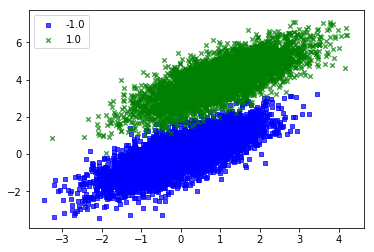

In [1]:
""""***********************************
* Name      : Sindhusha Devi Parimi   *
* Assignment: 2                       *
* Date Due  : 10/04/2019 11:59PM      *
*                                     *
************************************"""        

import numpy as np                                                                       #importing numpy
import matplotlib.pyplot as plt                                                          #importing matplotlib.pyplot for plotting the dataset
 

#creating dataset with random numbers with 5000 samples in each class
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)

#stacking the two 5000 samples into one single array
features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.full(num_observations, -1), np.ones(num_observations)))            #classifying first 5000 samples as class -1 and rest 5000 in class 1
train_percent = 0.8                                                                       #setting the train data percentage

#splitting dataset into train and test data(80,20)
sample = int(train_percent*num_observations*2)
labels=labels.reshape(10000,1)
features_labels=np.append(features, labels, axis=1)                                       #adding the labels into the list features array before shuffling
np.random.shuffle(features_labels)
                                                           
from mlxtend.plotting import category_scatter                                             #category_scatter plot is imported for plotting the data class wise

fig = category_scatter(x=0,y=1, label_col=2, 
                       data=features_labels, legend_loc='upper left')

features_labelstrain, features_labelstest = features_labels[:sample,:], features_labels[sample:, :]        #splitting into train and test data
#labels split
labels_train,labels_test=features_labelstrain[:,2],features_labelstest[:,2]                                #extracting the labels train and test data separately
#features split
features_train,features_test = features_labelstrain[:,0:2],features_labelstest[:,0:2]                      #extracting the features train and test data separately

#defining cost function
def cost_function(features, labels, weights,add_intercept):                                                #with or without intercept flag for the f(x) is passed here
  
  #when intercept is there, 3 columns of features are multiplied with 3 columns of weights according to the formula mentioned 
  if add_intercept:
    cost = (1/labels.size) * np.sum((np.log(1+np.exp(-(labels*((features[:,0]*weights[0])+(features[:,1]*weights[1])+(features[:,2]*weights[2])))))))
    
  else:
    cost = (1/labels.size) * np.sum((np.log(1+np.exp(-(labels*((features[:,0]*weights[0])+(features[:,1]*weights[1])))))))
#return cost calculated   
  return cost

#defining gradient function to minimize the cost function
def calc_gradient(features, labels, weights,add_intercept): 
  
  denominator = 1 / ( 1 + np.exp(labels * np.dot(features, weights.T,)))                                    #According to the LR gradient formula, calculating the denominator and placing it

  gradient = -(1/8000) * (np.dot(denominator* labels, features))                                            #dot product of the 1/denominator with labels and features according to formula
  
  return gradient                                                                                           #returning the gradient values
 
#combining all cost function and gradient function to calculate weights in this function 
def logistic_regression_PB(features, labels, num_steps, learning_rate,add_intercept):
  #when intercept factor is set true, initialze intercept array with ones with size of features rows
  if add_intercept:
    intercept = np.tile(1, (features.shape[0], 1))
    features = np.hstack(( features,intercept))                                                             #combining features array with intercept making it into 3 columns
    weights=np.zeros(3)                                                                                     #setting weights to 0 with 3 columns if intercept is true , meaning the last column is for intercept
  else:
    weights=np.zeros(2)                                                                                     #setting weights to 0 with 2 columns if intercept is false
 
  for i in range(num_steps):                                                                                #running a loop for the number of steps to calculate weights with setting learning rate and gradient
    gradient = calc_gradient(features, labels, weights,add_intercept)
    #avg_gradient=np.mean(gradient,axis=0)
    weights -= learning_rate * gradient
    
    #if(i % 1000 == 0):
    #  print(f'cost_func: {cost_function(features, labels, weights,add_intercept),weights} \t')             #printing cost function to check where it reaches minimum and return the optimal weights at that step accordingly 

  return weights
 
#calling logistic funct with desired steps and learning rate

weights_without=logistic_regression_PB(features_train,labels_train,30000,0.01,add_intercept=False )         #with intercept flag set as false, and learning rate as 0.01 , number of steps as 30000

weights_intercept = logistic_regression_PB(features_train,labels_train,30000,0.1,add_intercept=True )       #with intercept as true and learning rate as 0.1


In [0]:
#defining sigmoid function to use to check the probability to which class it belongs
def sigmoid(features, weights,add_intercept):
  #if intercept is true, change the features accordingly with 3rd column initializing it to 1
  if add_intercept:
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((features,intercept))
  
  z = np.dot(features, weights)
  
  return 1 / (1 + np.exp(-z))                                                                     #implementing sigmoid function


#defining function to predict classes basing on probability. 
def predictions(features,weights,add_intercept):
  test_preds=[]
  for i in sigmoid(features_test,weights,add_intercept):                                          #calling sigmoid function to get probability
    if i >= 0.5:                                                                                  #if probability is more than or equal to 0.5 then it falls under class 1 
      test_preds.append(1)
    else:
      test_preds.append(-1)                                                                       #else class -1
  np_testpreds= np.array(test_preds)                                                              #pass the values into a numpy array
  
  return np_testpreds

predict_values_inter=predictions(features_test,weights_without,False)                             #call the predictions function without intercept for test features data to see the prediction of classes


predict_values=predictions(features_test,weights_intercept,True)                                  #call the predictions function with intercept for test features data to see the prediction of classes



In [3]:
print("            TRAINED MODEL             ")
from sklearn.metrics import accuracy_score
print("***********Without Intercept**********")                                                   #importing accuracy_score from sklearn to find accuracy of the predictions of test features(no intercept) with the actual test labels
print("Weights:",weights_without)
print("Accuracy:",accuracy_score(labels_test,predict_values_inter))                               #printing the accuracy score

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test,predict_values_inter)                             #importing confusion matrix from sklearn to pass actual labels and predicted labels
print("Confusion Matrix:")
print(confusion_matrix)

print("***********With Intercept*************")
print("Weights:",weights_intercept)                                                         
print("Accuracy:",accuracy_score(labels_test,predict_values))                                     #importing accuracy_score from sklearn to find accuracy of the predictions of test features(intercept) with the actual test labels
 
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(labels_test,predict_values)                                   #confusion_matrix = confusion_matrix(labels_test,predict_values)                                   
print("Confusion Matrix:")
print(confusion_matrix)                      

print()
print("           SKLEARN MODEL               ")                  
#calculating logistic regression using sklearn
from sklearn.linear_model import LogisticRegression                                               #importing LogisticRegression model from sklearn to compare our trained model

print("***********Without Intercept**********")
      
clf = LogisticRegression(solver='lbfgs',fit_intercept=False)                                      #calling regressionmodel for no intercept
clf.fit(features_train, labels_train)                                                             #passing the features and labels of train data
coef=clf.coef_[0]
print("Weights:",coef)                                                                                       #printing the weights

y_pred = clf.predict(features_test)                                                               #predicting the test data labels
print('Accuracy: {:.2f}'.format(accuracy_score(labels_test,y_pred)))            #finding accuracy_score for actual labels and test predicted values with the sklearn model
print()
print("***********With Intercept*************")

lr_intercept = LogisticRegression(solver='lbfgs',fit_intercept=True)                              #passing the intercept flag to true and calling the linearregression model
lr_intercept.fit(features_train, labels_train)                                                    #passing features train data and labels train data
coefficients,intercept=lr_intercept.coef_,lr_intercept.intercept_                                 #printing weights and also intercept
print("Weights,Intercept:",coefficients,intercept)

inter_pred = lr_intercept.predict(features_test)
print('Accuracy: {:.2f}'.format(accuracy_score(labels_test,inter_pred)))           #finding accuracy score for actual labels and predicted labels with sklearn model with intercept

            TRAINED MODEL             
***********Without Intercept**********
Weights: [-0.68269194  1.06135785]
Accuracy: 0.7215
Confusion Matrix:
[[484 557]
 [  0 959]]
***********With Intercept*************
Weights: [-3.58808     5.7931095  -9.74193308]
Accuracy: 0.995
Confusion Matrix:
[[1038    3]
 [   7  952]]

           SKLEARN MODEL               
***********Without Intercept**********
Weights: [-0.68069713  1.06003492]
Accuracy: 0.72

***********With Intercept*************
Weights,Intercept: [[-3.81807279  6.28465546]] [-10.71441417]
Accuracy: 0.99
